In [128]:
import pandas as pd
import requests
import numpy as np
# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)
# see numbers after decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
from pywaffle import Waffle

population source: https://censusindia.gov.in/census.website/data/population-finder

In [53]:
url = "https://loadqa.ndapapi.com/v1/openapi?API_Key=gAAAAABkNw8zHyqnxWPYbu6adS2fHQzNr41S-5aOXlUOm73KimNUu4rOPTwl9v8vc_jEp3bh5PR12Iwr3poLbBUBYvGGZN3ALC4fDL48NWCYHzvk1ReQggAa8Va7d_hG57k8wVBch0c1eD0g2bmrSCLtQKYuk_qKJR6D36xk6YM-dEEY0BRgCWBN76w0Kv_GAT0Gw6WYrlIo&ind=I7150_4,I7150_5,I7150_6,I7150_7,I7150_8,I7150_9,I7150_10,I7150_11,I7150_12,I7150_13,I7150_14,I7150_15,I7150_16,I7150_17,I7150_18,I7150_19,I7150_20,I7150_21,I7150_22,I7150_23,I7150_24&dim=Country,StateName,StateCode,DistrictName,DistrictCode,Year,D7150_3,D7150_26&pageno=1"

In [54]:
response = requests.get(url)
response

<Response [200]>

In [55]:
doc = response.json()
doc

In [ ]:
doc.keys()

In [ ]:
list_of_dict = doc['Headers']['Items']
list_of_dict

[{'ID': 'Country',
  'DisplayName': 'Country',
  'indicator_dimension': 'Dimension',
  'DataType': 'text',
  'UnitsofMeaseure': None,
  'ScalingFactor': 'None',
  'colorIndicator': 1,
  'joinIndicator': 0,
  'altid': 'Country',
  'source_code': 7150,
  'dataset_name': 'District and Taluk Court Cases',
  'tooltip': 'Country',
  'dimension_type': 'Location',
  'hierarchy_level': 0.0,
  'sequence_id': 1,
  'Weighing_Variable': None,
  'default_aggregation_location': None,
  'default_aggregation_time': None,
  'PrimaryKey': None,
  'VariableType': 'Key Identifier'},
 {'ID': 'StateCode',
  'DisplayName': 'State LGD Code',
  'indicator_dimension': 'Dimension',
  'DataType': 'Number',
  'UnitsofMeaseure': None,
  'ScalingFactor': 'None',
  'colorIndicator': 1,
  'joinIndicator': 0,
  'altid': 'StateCode',
  'source_code': 7150,
  'dataset_name': 'District and Taluk Court Cases',
  'tooltip': 'State LGD Code',
  'dimension_type': 'Location',
  'hierarchy_level': 2.0,
  'sequence_id': 2,
  'Wei

In [ ]:
list_of_dict[10].values()

dict_values(['I7150_6', 'Pending cases for a period of 3 to 5 Years', 'Indicator', 'Number', 'Number', 'Actuals', 1, 0, 'I7150_6', 7150, 'District and Taluk Court Cases', 'Pending cases for a period of 3 to 5 Years', 'Measures', None, 12, 'Total Population from Census', 'sum', 'sum', None, 'Numeric Variable'])

In [ ]:
empty_dict = {}
for each in list_of_dict:
    #print(each)
    key_element = each['ID']
    value_element = each['DisplayName']
    empty_dict[key_element] = value_element

empty_dict

{'Country': 'Country',
 'StateCode': 'State LGD Code',
 'StateName': 'State',
 'DistrictCode': 'District LGD Code',
 'DistrictName': 'District',
 'Year': 'Year',
 'D7150_3': 'District and Taluk Court Case type',
 'D7150_26': 'Date of extraction',
 'I7150_4': 'Pending cases for a period of 0 to 1 Years',
 'I7150_5': 'Pending cases for a period of 1 to 3 Years',
 'I7150_6': 'Pending cases for a period of 3 to 5 Years',
 'I7150_7': 'Pending cases for a period of 5 to 10 Years',
 'I7150_8': 'Pending cases for a period of 10 to 20 Years',
 'I7150_9': 'Pending cases for a period of 20 to 30 Years',
 'I7150_10': 'Pending cases over 30 Years',
 'I7150_11': 'Pending cases',
 'I7150_12': 'Original pending cases',
 'I7150_13': 'Pending Appeal cases',
 'I7150_14': 'Pending Application cases',
 'I7150_15': 'Pending Execution cases',
 'I7150_16': 'Cases pending at Appearance or Service-Related stage',
 'I7150_17': 'Cases pending at Compliance or Steps or stay stage',
 'I7150_18': 'Cases pending at E

In [ ]:
codes = pd.DataFrame(list(empty_dict.items()))
codes

,0,1
0,Country,Country
1,StateCode,State LGD Code
2,StateName,State
3,DistrictCode,District LGD Code
4,DistrictName,District
5,Year,Year
6,D7150_3,District and Taluk Court Case type
7,D7150_26,Date of extraction
8,I7150_4,Pending cases for a period of 0 to 1 Years
9,I7150_5,Pending cases for a period of 1 to 3 Years


In [ ]:
headers = ['code', 'head']

In [ ]:
codes.columns = headers

In [63]:
codes

,code,head
0,Country,Country
1,StateCode,State LGD Code
2,StateName,State
3,DistrictCode,District LGD Code
4,DistrictName,District
5,Year,Year
6,D7150_3,District and Taluk Court Case type
7,D7150_26,Date of extraction
8,I7150_4,Pending cases for a period of 0 to 1 Years
9,I7150_5,Pending cases for a period of 1 to 3 Years


In [64]:
list_of_data = doc['Data']
list_of_data

In [ ]:
for every in list_of_data:
    print(f"{every['D7150_26']} and {every['Year']}")

In [ ]:
ld = []
for each in list_of_data:
    data_dict = {}
    data_dict['0_to_1'] = each['I7150_4']['sum'] # I7150_4
    data_dict['1_to_3'] = each['I7150_5']['sum'] # I7150_5
    data_dict['3_to_5'] = each['I7150_6']['sum'] #pending for 3-5 years
    data_dict['5_to_10'] = each['I7150_7']['sum'] #pending for 5-10 years
    data_dict['10_to_20'] = each['I7150_8']['sum'] #pending for 10-20 years
    data_dict['20_to_30'] = each['I7150_9']['sum'] #pending for 20-30 years
    data_dict['over_30'] = each['I7150_10']['sum'] #pending for over 30 years
    data_dict['district'] = each['DistrictName'] #district name
    data_dict['date_collected'] = each['D7150_26'] #date of data collection
    data_dict['case_type'] = each['D7150_3'] #criminal or civil
    data_dict['state'] = each['StateName'] #State
    ld.append(data_dict)

In [ ]:
df = pd.DataFrame(ld)
df

,0_to_1,1_to_3,3_to_5,5_to_10,10_to_20,20_to_30,over_30,district,date_collected,case_type,state
0,2085.00,2047.00,1078.00,653.00,152.00,12.00,0.00,Anantnag,18-Jan-2023,Civil,Jammu And Kashmir
1,2998.00,2637.00,1487.00,1996.00,348.00,3.00,0.00,Anantnag,18-Jan-2023,Criminal,Jammu And Kashmir
2,5083.00,4684.00,2565.00,2649.00,500.00,15.00,0.00,Anantnag,18-Jan-2023,Total,Jammu And Kashmir
3,1707.00,1060.00,575.00,651.00,120.00,6.00,0.00,Budgam,18-Jan-2023,Civil,Jammu And Kashmir
4,2026.00,2237.00,1590.00,1602.00,422.00,0.00,0.00,Budgam,18-Jan-2023,Criminal,Jammu And Kashmir
...,...,...,...,...,...,...,...,...,...,...,...
995,13726.00,13589.00,13517.00,15002.00,6102.00,1839.00,538.00,Birbhum,18-Jan-2023,Total,West Bengal
996,1652.00,1289.00,971.00,842.00,192.00,17.00,4.00,Coochbehar,18-Jan-2023,Civil,West Bengal
997,4817.00,5209.00,5448.00,10691.00,5233.00,383.00,35.00,Coochbehar,18-Jan-2023,Criminal,West Bengal
998,6469.00,6498.00,6419.00,11533.00,5425.00,400.00,39.00,Coochbehar,18-Jan-2023,Total,West Bengal


In [41]:
df1 = pd.read_csv('shalakashinde2_1684774734767266.csv')
df1

,Country,State,District,Year,District and Taluk Court Case type,Date of extraction,Pending cases for a period of 0 to 1 Years,Pending cases for a period of 1 to 3 Years,Pending cases for a period of 3 to 5 Years,Pending cases for a period of 5 to 10 Years,Pending cases for a period of 10 to 20 Years,Pending cases for a period of 20 to 30 Years,Pending cases over 30 Years,Pending cases,Original pending cases,Pending Appeal cases,Pending Application cases,Pending Execution cases,Cases pending at Appearance or Service-Related stage,Cases pending at Compliance or Steps or stay stage,Cases pending at Evidence or Argument or Judgement stage,Cases pending at Pleadings or Issues or Charge stage,Cases instituted in last month,Cases disposed in last month,Cases filed by Senior Citizens,Cases filed by women,Cases delayed in disposal
0,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Civil,18-Jan-2023,80.00,231.00,906.00,1414.00,553.00,19.00,1.00,3204.00,2806.00,226.00,0.00,161.00,865.00,617.00,1457.00,256.00,2.00,0.00,48.00,755.00,0.00
1,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,86.00,673.00,3683.00,3272.00,934.00,57.00,5.00,8710.00,7949.00,24.00,5.00,2.00,6203.00,362.00,1875.00,206.00,4.00,4.00,0.00,23.00,0.00
2,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,166.00,904.00,4589.00,4686.00,1487.00,76.00,6.00,11914.00,10755.00,250.00,5.00,163.00,7068.00,979.00,3332.00,462.00,6.00,4.00,48.00,778.00,0.00
3,India,Andhra Pradesh,Anantapur,"Calendar Year (Jan - Dec), 2023",Civil,18-Jan-2023,11666.00,10318.00,8753.00,5229.00,708.00,17.00,3.00,36694.00,29217.00,762.00,89.00,6625.00,8893.00,5761.00,11382.00,9403.00,1396.00,1305.00,7261.00,7283.00,136.00
4,India,Andhra Pradesh,Anantapur,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,17288.00,6986.00,5863.00,2689.00,46.00,14.00,14.00,32900.00,32007.00,146.00,747.00,0.00,20378.00,2150.00,9521.00,597.00,2869.00,732.00,451.00,1131.00,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,India,West Bengal,Purba Bardhaman,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,10722.00,9006.00,11409.00,11011.00,4987.00,1388.00,134.00,48657.00,43294.00,460.00,1493.00,3363.00,22073.00,3144.00,18977.00,3291.00,1292.00,1278.00,493.00,8388.00,28372.00
2060,India,West Bengal,Purba Bardhaman,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,16819.00,14768.00,16222.00,17837.00,7168.00,1738.00,241.00,74793.00,66812.00,1418.00,1854.00,4662.00,31238.00,8530.00,28282.00,5464.00,1796.00,1852.00,6053.00,14056.00,50656.00
2061,India,West Bengal,Purulia,"Calendar Year (Jan - Dec), 2023",Civil,18-Jan-2023,1952.00,2398.00,2398.00,2540.00,639.00,163.00,32.00,10122.00,9059.00,744.00,16.00,304.00,4110.00,1795.00,3303.00,845.00,150.00,190.00,2746.00,857.00,12800.00
2062,India,West Bengal,Purulia,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,3831.00,3609.00,4478.00,4875.00,3022.00,1074.00,213.00,21102.00,18176.00,97.00,1561.00,1256.00,10189.00,665.00,7703.00,2425.00,1281.00,1387.00,140.00,1675.00,12730.00


In [42]:
df1.columns = df1.columns.str.replace(" ", "").str.replace("Pendingcasesforaperiodof", "").str.replace("Pendingcases", "").\
str.replace("Years",  "")

In [49]:
df1=df1.drop(columns=["", "Originalpendingcases", "PendingAppealcases","PendingApplicationcases","PendingExecutioncases","CasespendingatAppearanceorService-Relatedstage","CasespendingatComplianceorStepsorstaystage","CasespendingatEvidenceorArgumentorJudgementstage","CasespendingatPleadingsorIssuesorChargestage","Casesinstitutedinlastmonth","Casesdisposedinlastmonth","CasesfiledbySeniorCitizens","Casesfiledbywomen","Casesdelayedindisposal"])

KeyError: "['Originalpendingcases', 'PendingAppealcases', 'PendingApplicationcases', 'PendingExecutioncases', 'CasespendingatAppearanceorService-Relatedstage', 'CasespendingatComplianceorStepsorstaystage', 'CasespendingatEvidenceorArgumentorJudgementstage', 'CasespendingatPleadingsorIssuesorChargestage', 'Casesinstitutedinlastmonth', 'Casesdisposedinlastmonth', 'CasesfiledbySeniorCitizens', 'Casesfiledbywomen', 'Casesdelayedindisposal'] not found in axis"

In [53]:
df1 = df1.drop(columns=[''])

In [57]:
df1.columns = df1.columns.str.replace("to", "_to_").str.replace("over", "over_")

In [61]:
df1.head(1)

,Country,State,District,Year,DistrictandTalukCourtCasetype,Dateofextraction,0_to_1,1_to_3,3_to_5,5_to_10,10_to_20,20_to_30,over_30
0,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Civil,18-Jan-2023,80.00,231.00,906.00,1414.00,553.00,19.00,1.00


In [63]:
criminal = df1[df1.DistrictandTalukCourtCasetype == 'Criminal'].reset_index(drop=True)
criminal.head(1)

,Country,State,District,Year,DistrictandTalukCourtCasetype,Dateofextraction,0_to_1,1_to_3,3_to_5,5_to_10,10_to_20,20_to_30,over_30
0,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,86.00,673.00,3683.00,3272.00,934.00,57.00,5.00


In [64]:
criminal['total_criminal'] = criminal['0_to_1'] + criminal['1_to_3'] + criminal['3_to_5'] + \
criminal['5_to_10'] + criminal['10_to_20'] + criminal['20_to_30'] + \
criminal['over_30']

In [69]:
total = df1[df1.DistrictandTalukCourtCasetype == 'Total'].reset_index(drop=True)
total.head(1)

,Country,State,District,Year,DistrictandTalukCourtCasetype,Dateofextraction,0_to_1,1_to_3,3_to_5,5_to_10,10_to_20,20_to_30,over_30
0,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,166.00,904.00,4589.00,4686.00,1487.00,76.00,6.00


In [70]:
total.columns = total.columns + "_t"

In [71]:
merged1 = pd.concat([total, criminal], axis=1)
merged1.head(1)

,Country_t,State_t,District_t,Year_t,DistrictandTalukCourtCasetype_t,Dateofextraction_t,0_to_1_t,1_to_3_t,3_to_5_t,5_to_10_t,10_to_20_t,20_to_30_t,over_30_t,Country,State,District,Year,DistrictandTalukCourtCasetype,Dateofextraction,0_to_1,1_to_3,3_to_5,5_to_10,10_to_20,20_to_30,over_30,total_criminal
0,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,166.00,904.00,4589.00,4686.00,1487.00,76.00,6.00,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,86.00,673.00,3683.00,3272.00,934.00,57.00,5.00,8710.00


In [72]:
# merged = criminal.merge(total, on='district', how='left')
# merged.head(1)
merged1.head(1)

,Country_t,State_t,District_t,Year_t,DistrictandTalukCourtCasetype_t,Dateofextraction_t,0_to_1_t,1_to_3_t,3_to_5_t,5_to_10_t,10_to_20_t,20_to_30_t,over_30_t,Country,State,District,Year,DistrictandTalukCourtCasetype,Dateofextraction,0_to_1,1_to_3,3_to_5,5_to_10,10_to_20,20_to_30,over_30,total_criminal
0,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,166.00,904.00,4589.00,4686.00,1487.00,76.00,6.00,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,86.00,673.00,3683.00,3272.00,934.00,57.00,5.00,8710.00


In [73]:
merged1['total_pending'] = merged1['0_to_1_t'] + merged1['1_to_3_t'] + merged1['3_to_5_t'] + merged1['5_to_10_t'] + \
merged1['10_to_20_t'] + merged1['over_30_t'] + merged1['20_to_30_t']

In [74]:
merged1['pct_criminal'] = merged1['total_criminal'] / merged1['total_pending'] * 100

In [75]:
merged1.head(1)

,Country_t,State_t,District_t,Year_t,DistrictandTalukCourtCasetype_t,Dateofextraction_t,0_to_1_t,1_to_3_t,3_to_5_t,5_to_10_t,10_to_20_t,20_to_30_t,over_30_t,Country,State,District,Year,DistrictandTalukCourtCasetype,Dateofextraction,0_to_1,1_to_3,3_to_5,5_to_10,10_to_20,20_to_30,over_30,total_criminal,total_pending,pct_criminal
0,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,166.00,904.00,4589.00,4686.00,1487.00,76.00,6.00,India,Andaman And Nicobar Islands,South Andamans,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,86.00,673.00,3683.00,3272.00,934.00,57.00,5.00,8710.00,11914.00,73.11


In [76]:
# merged1['pct_5_10'] = (merged1['5_to_10'] / merged1['5_to_10_t']) * 100
# merged1['pct_10_20'] = (merged1['10_to_20'] / merged1['10_to_20_t']) * 100
# merged1['pct_20_30'] = (merged1['20_to_30'] / merged1['20_to_30_t']) * 100
# merged1['pct_over_30'] = (merged1['over_30'] / merged1['over_30_t']) * 100
# merged.sort_values(by='pct_10_20', ascending=False)

In [77]:
merged1.sort_values(by='pct_criminal', ascending=False)

,Country_t,State_t,District_t,Year_t,DistrictandTalukCourtCasetype_t,Dateofextraction_t,0_to_1_t,1_to_3_t,3_to_5_t,5_to_10_t,10_to_20_t,20_to_30_t,over_30_t,Country,State,District,Year,DistrictandTalukCourtCasetype,Dateofextraction,0_to_1,1_to_3,3_to_5,5_to_10,10_to_20,20_to_30,over_30,total_criminal,total_pending,pct_criminal
384,India,Meghalaya,North Garo Hills,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,87.00,84.00,22.00,30.00,21.00,5.00,0.00,India,Meghalaya,North Garo Hills,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,85.00,84.00,22.00,30.00,21.00,5.00,0.00,247.00,249.00,99.20
605,India,Uttar Pradesh,Gautam Buddha Nagar,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,469721.00,55821.00,38433.00,48024.00,27592.00,1122.00,74.00,India,Uttar Pradesh,Gautam Buddha Nagar,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,462478.00,49870.00,33212.00,43604.00,26444.00,1067.00,66.00,616741.00,640787.00,96.25
46,India,Assam,West Karbi Anglong,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,408.55,495.09,349.97,266.12,160.82,29.10,1.91,India,Assam,West Karbi Anglong,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,366.05,480.92,344.99,262.67,159.29,28.72,1.91,1644.56,1711.57,96.09
33,India,Assam,Karbi Anglong,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,658.45,797.91,564.03,428.88,259.18,46.90,3.09,India,Assam,Karbi Anglong,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,589.95,775.08,556.01,423.33,256.71,46.28,3.09,2650.44,2758.43,96.09
423,India,Odisha,Nabarangpur,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,1798.00,4531.00,5063.00,4732.00,2587.00,317.00,2.00,India,Odisha,Nabarangpur,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,1568.00,4261.00,4836.00,4644.00,2576.00,315.00,1.00,18201.00,19030.00,95.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,India,Manipur,Tengnoupal,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,25.11,3.70,2.47,2.47,0.00,0.00,0.00,India,Manipur,Tengnoupal,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,7.00,1.65,0.41,0.41,0.00,0.00,0.00,9.47,33.75,28.05
377,India,Manipur,Tamenglong,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,13.40,22.33,15.95,21.69,1.28,0.00,0.00,India,Manipur,Tamenglong,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,5.74,5.74,2.55,4.47,1.28,0.00,0.00,19.78,74.65,26.50
374,India,Manipur,Noney,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,7.60,12.67,9.05,12.31,0.72,0.00,0.00,India,Manipur,Noney,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,3.26,3.26,1.45,2.53,0.72,0.00,0.00,11.22,42.35,26.50
564,India,Telangana,Warangal,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,711.00,1708.00,2165.00,1687.00,255.00,11.00,1.00,India,Telangana,Warangal,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,206.00,408.00,397.00,378.00,35.00,4.00,1.00,1429.00,6538.00,21.86


In [78]:
merged1.to_csv("NDAP_API_data.csv", index=False)

In [9]:
re_df = pd.read_csv('NDAP_API_data.csv').sort_values(by='pct_criminal', ascending=False)
re_df.head(1)

,Country_t,State_t,District_t,Year_t,DistrictandTalukCourtCasetype_t,Dateofextraction_t,0_to_1_t,1_to_3_t,3_to_5_t,5_to_10_t,10_to_20_t,20_to_30_t,over_30_t,Country,State,District,Year,DistrictandTalukCourtCasetype,Dateofextraction,0_to_1,1_to_3,3_to_5,5_to_10,10_to_20,20_to_30,over_30,total_criminal,total_pending,pct_criminal
384,India,Meghalaya,North Garo Hills,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,87.00,84.00,22.00,30.00,21.00,5.00,0.00,India,Meghalaya,North Garo Hills,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,85.00,84.00,22.00,30.00,21.00,5.00,0.00,247.00,249.00,99.20


In [10]:
# re_df['0_to_1_civil'] = re_df['0_to_1_t'] - re_df['0_to_1']
# re_df['1_to_3_civil'] = re_df['1_to_3_t'] - re_df['1_to_3']
# re_df['3_to_5_civil'] = re_df['3_to_5_t'] - re_df['3_to_5']
# re_df['5_to_10_civil'] = re_df['5_to_10_t'] - re_df['5_to_10']
# re_df['10_to_20_civil'] = re_df['10_to_20_t'] - re_df['10_to_20']
# re_df['20_to_30_civil'] = re_df['20_to_30_t'] - re_df['20_to_30']
# re_df['over_30_civil'] = re_df['over_30_t'] - re_df['over_30']

In [11]:
# re_df['0_to_10_civil'] = re_df['0_to_1_civil'] + re_df['1_to_3_civil'] + re_df['3_to_5_civil'] + re_df['5_to_10_civil']

In [12]:
re_df['0_to_10'] = re_df['0_to_1'] + re_df['1_to_3'] + re_df['3_to_5'] + re_df['5_to_10']

In [13]:
re_df['total_criminal'].sum().round()

32247729.0

In [14]:
re_df = re_df.pivot_table(index=['State'], aggfunc='sum').reset_index()

/var/folders/6g/mf4qklbs63q07skjqqfkj5lw0000gn/T/ipykernel_79731/2794856200.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  re_df = re_df.pivot_table(index=['State'], aggfunc='sum').reset_index()


In [15]:
# '0_to_1_civil',  '1_to_3_civil', '3_to_5_civil', '5_to_10_civil',

In [16]:
re_df = re_df.drop(columns=['0_to_1',  '1_to_3', '3_to_5', '5_to_10', '0_to_1_t',  '1_to_3_t', '3_to_5_t', '5_to_10_t'])

In [17]:
# re_df['total_civil'] = re_df['total_pending'] - re_df['total_criminal']

In [18]:
pop = pd.read_csv('India_2011_census.csv').drop(labels=[0]).reset_index(drop=True)
pop['Name'] = pop['Name'].str.title().str.replace("&", "And")
pop.head()

,Name,TOT_P
0,Jammu And Kashmir,12541302
1,Himachal Pradesh,6864602
2,Punjab,27743338
3,Chandigarh,1055450
4,Uttarakhand,10086292


In [99]:
pop_df = re_df.merge(pop, left_on='State', right_on='Name')
pop_df.head(2)

,State,0_to_10,10_to_20,10_to_20_t,20_to_30,20_to_30_t,over_30,over_30_t,pct_criminal,total_criminal,total_pending,Name,TOT_P
0,Andaman And Nicobar Islands,7714.00,934.00,1487.00,57.00,76.00,5.00,6.00,73.11,8710.00,11914.00,Andaman And Nicobar Islands,380581
1,Andhra Pradesh,414377.00,1810.00,10386.00,179.00,483.00,74.00,103.00,652.46,416440.00,831002.00,Andhra Pradesh,84580777


In [100]:
pop_df['total_criminal_pop'] = (pop_df['total_criminal'] / pop_df['TOT_P']) * 100000
pop_df['total_pending_pop'] = (pop_df['total_pending'] / pop_df['TOT_P']) * 100000
# pop_df['total_civil_pop'] = (pop_df['total_civil'] / pop_df['TOT_P']) * 100000
pop_df['0_to_10_pop'] = (pop_df['0_to_10'] / pop_df['TOT_P']) * 100000
pop_df['10_to_20_pop'] = (pop_df['10_to_20'] / pop_df['TOT_P']) * 100000
pop_df['20_to_30_pop'] = (pop_df['20_to_30'] / pop_df['TOT_P']) * 100000
pop_df['over_30_pop'] = (pop_df['over_30'] / pop_df['TOT_P']) * 100000

In [106]:
for_gfx = pop_df.drop(columns=['10_to_20_t', '20_to_30_t', 'over_30_t', 'pct_criminal', 'Name'])
for_gfx.head(1)

,State,0_to_10,10_to_20,20_to_30,over_30,total_criminal,total_pending,TOT_P,total_criminal_pop,total_pending_pop,0_to_10_pop,10_to_20_pop,20_to_30_pop,over_30_pop
0,Andaman And Nicobar Islands,7714.00,934.00,57.00,5.00,8710.00,11914.00,380581,2288.61,3130.48,2026.90,245.41,14.98,1.31


In [107]:
for_gfx.to_csv('for_gfx.csv', index=False)

In [108]:
ten_twenty

,State,total_criminal,total_pending,TOT_P,total_criminal_pop,total_pending_pop,0_to_10_pop,10_to_20_pop,20_to_30_pop,over_30_pop
0,Uttar Pradesh,9115419.00,10972725.00,199812341,4561.99,5491.52,3827.77,623.33,99.01,11.88
1,Bihar,2938316.00,3448035.00,104099452,2822.60,3312.25,2264.67,476.21,73.28,8.44
2,Odisha,1258804.00,1561229.00,41974218,2998.99,3719.50,2475.49,427.24,85.54,10.71
3,West Bengal,2169232.00,2783801.00,91276115,2376.56,3049.87,1884.81,421.96,54.95,14.83
4,Andaman And Nicobar Islands,8710.00,11914.00,380581,2288.61,3130.48,2026.90,245.41,14.98,1.31
5,Maharashtra,3426847.00,5000245.00,112374333,3049.49,4449.63,2786.09,193.55,47.95,21.90
6,Gujarat,1340103.00,1762796.00,60439692,2217.26,2916.62,2066.72,111.28,34.28,4.98
7,Puducherry,17294.00,29292.00,1247953,1385.79,2347.20,1280.50,103.93,1.36,0.00
8,Rajasthan,1500146.00,2037537.00,68548437,2188.45,2972.40,2095.37,89.81,3.05,0.22
9,Jharkhand,431731.00,521991.00,32988134,1308.75,1582.36,1241.65,63.72,2.65,0.72


In [127]:
twenty_thirty = for_gfx.sort_values(by="over_30", ascending=False).reset_index(drop=True)
twenty_thirty.to_csv('for_waffle.csv', index=False)
over_thirty = pd.read_csv('for_waffle.csv', usecols=['State', 'over_30'])
over_thirty['over_30'].sum()

79162.0

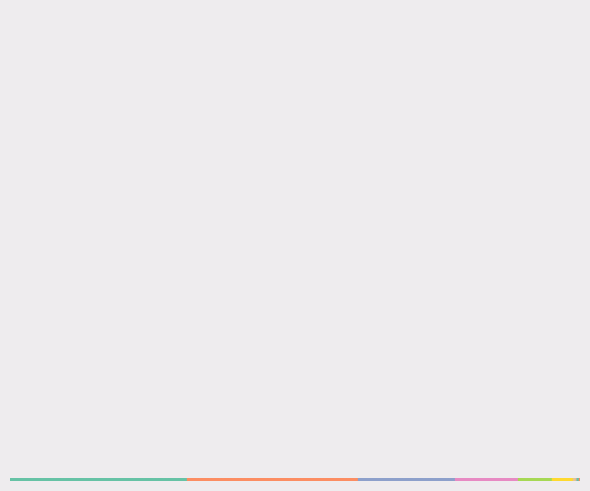

In [123]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': over_thirty['over_30'] / 100,  # Convert actual number to a reasonable block number
#             'labels': [f"{k} ({v}) million ton" for k, v in for_gfx['10_to_20_pop'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
#             'title': {'label': 'China', 'loc': 'left', 'fontsize': 12}
        },
#         312: {
#             'values': data['India'] / 10000000,
#             'labels': [f"{k} ({v/1000000}) million ton" for k, v in data['India'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
#             'title': {'label': 'India', 'loc': 'left', 'fontsize': 12}
#         },
#         313: {
#             'values': data['Indonesia'] / 10000000,
#             'labels': [f"{k} ({v/1000000}) million ton" for k, v in data['Indonesia'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
#             'title': {'label': 'Indonesia', 'loc': 'left', 'fontsize': 12}
#         },
    },
    rows=2,  # Outside parameter applied to all subplots, same as below
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(6, 9)
)

fig.suptitle('\n', fontsize=20, fontweight='bold')
# fig.supxlabel('1 block = cases per 1000 person', fontsize=8, ha='center')
fig.set_facecolor('#eeecee')
# fig.savefig("ten_twenty.svg")

In [21]:
state_dicts = pop_df.to_dict(orient='records')

In [22]:

# Generate the JavaScript file content
js_content = str(state_dicts)

# Write the content to a .js file
with open('for_svelte_data2.js', 'w') as js_file:
    js_file.write(js_content)

In [23]:
pop_df.head(1)

,State,0_to_10,10_to_20,10_to_20_t,20_to_30,20_to_30_t,over_30,over_30_t,pct_criminal,total_criminal,total_pending,Name,TOT_P,total_criminal_pop,total_pending_pop,0_to_10_pop,10_to_20_pop,20_to_30_pop,over_30_pop
0,Andaman And Nicobar Islands,7714.00,934.00,1487.00,57.00,76.00,5.00,6.00,73.11,8710.00,11914.00,Andaman And Nicobar Islands,380581,2288.61,3130.48,2026.90,245.41,14.98,1.31


In [3]:
working_df.State.nunique()

34

In [4]:
working_df.District.nunique()

683

In [ ]:
pd.pivot_table(re_df, index=['State'], aggfunc='sum')

In [21]:
table = pd.pivot_table(working_df, index=['State'], aggfunc='sum')
df_final = table.reset_index()
df_final.head()

/var/folders/6g/mf4qklbs63q07skjqqfkj5lw0000gn/T/ipykernel_64571/2353814606.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  table = pd.pivot_table(working_df, index=['State'], aggfunc='sum')


,State,0_to_1,0_to_1_t,10_to_20,10_to_20_t,1_to_3,1_to_3_t,20_to_30,20_to_30_t,3_to_5,3_to_5_t,5_to_10,5_to_10_t,over_30,over_30_t,pct_criminal,total_criminal,total_pending
0,Andaman And Nicobar Islands,86.00,166.00,934.00,1487.00,673.00,904.00,57.00,76.00,3683.00,4589.00,3272.00,4686.00,5.00,6.00,73.11,8710.00,11914.00
1,Andhra Pradesh,171969.00,298041.00,1810.00,10386.00,122175.00,245064.00,179.00,483.00,86681.00,182224.00,33552.00,94701.00,74.00,103.00,652.46,416440.00,831002.00
2,Assam,163542.00,198210.00,5579.00,7352.00,98681.00,125152.00,213.00,317.00,69336.00,87071.00,46810.00,59673.00,7.00,30.00,2752.52,384168.00,477805.00
3,Bihar,307217.00,400766.00,495731.00,557637.00,545285.00,635442.00,76286.00,90951.00,666039.00,773578.00,838971.00,976211.00,8787.00,13450.00,3156.01,2938316.00,3448035.00
4,Chandigarh,25055.00,32386.00,93.00,190.00,19221.00,26296.00,3.00,6.00,9901.00,16382.00,2165.00,4396.00,0.00,0.00,70.85,56438.00,79656.00


In [28]:
df_final = df_final.drop(columns=['0_to_1_t', '10_to_20_t', '1_to_3_t', '20_to_30_t', '3_to_5_t', '5_to_10_t', 'over_30_t'])
df_final

KeyError: "['0_to_1_t', '10_to_20_t', '1_to_3_t', '20_to_30_t', '3_to_5_t', '5_to_10_t', 'over_30_t'] not found in axis"

In [31]:
df_final.to_json('for_svelte_data.js')

In [37]:
df_final.head()

,State,0_to_1,10_to_20,1_to_3,20_to_30,3_to_5,5_to_10,over_30,pct_criminal,total_criminal,total_pending
0,Andaman And Nicobar Islands,86.00,934.00,673.00,57.00,3683.00,3272.00,5.00,73.11,8710.00,11914.00
1,Andhra Pradesh,171969.00,1810.00,122175.00,179.00,86681.00,33552.00,74.00,652.46,416440.00,831002.00
2,Assam,163542.00,5579.00,98681.00,213.00,69336.00,46810.00,7.00,2752.52,384168.00,477805.00
3,Bihar,307217.00,495731.00,545285.00,76286.00,666039.00,838971.00,8787.00,3156.01,2938316.00,3448035.00
4,Chandigarh,25055.00,93.00,19221.00,3.00,9901.00,2165.00,0.00,70.85,56438.00,79656.00


In [48]:
df_final['0_to_10'] = df_final['0_to_1'] + df_final['1_to_3'] + df_final['3_to_5'] + df_final['5_to_10']

In [51]:
df_final = df_final.drop(columns=['0_to_1', '1_to_3', '3_to_5', '5_to_10'])

In [56]:
df_final['total_civil'] = df_final['total_pending'] - df_final['total_criminal']

In [57]:
state_dicts = df_final.to_dict(orient='records')

In [60]:

# Generate the JavaScript file content
js_content = str(state_dicts)

# Write the content to a .js file
with open('for_svelte_data.js', 'w') as js_file:
    js_file.write(js_content)

In [108]:
working_df['for_map'] = working_df['20_to_30'] + working_df['over_30']

In [116]:
working_df[working_df['District'] == "Khordha"]

,Country_t,State_t,District_t,Year_t,DistrictandTalukCourtCasetype_t,Dateofextraction_t,0_to_1_t,1_to_3_t,3_to_5_t,5_to_10_t,10_to_20_t,20_to_30_t,over_30_t,Country,State,District,Year,DistrictandTalukCourtCasetype,Dateofextraction,0_to_1,1_to_3,3_to_5,5_to_10,10_to_20,20_to_30,over_30,total_criminal,total_pending,pct_criminal,for_map
419,India,Odisha,Khordha,"Calendar Year (Jan - Dec), 2023",Total,18-Jan-2023,24082.00,30167.00,28683.00,48661.00,35497.00,11365.00,3586.00,India,Odisha,Khordha,"Calendar Year (Jan - Dec), 2023",Criminal,18-Jan-2023,15074.00,22764.00,22504.00,38498.00,29801.00,10795.00,3547.00,142983.00,182041.00,78.54,14342.00


In [114]:
working_df.sort_values(by=['over_30'], ascending=False).groupby('District').for_map.sum().reset_index().sort_values("for_map", ascending=False).head(18)#.to_csv('for_dw_district.csv', index=False)

,District,for_map
415,Mumbai,25311.00
1,24 Paraganas South,16702.00
332,Khordha,14342.00
488,Prayagraj,14290.00
428,Nagpur,13869.00
345,Kolkata,11527.00
491,Pune,11452.00
5,Ahmadabad,11398.00
221,Gorakhpur,10808.00
618,Thane,10329.65


In [112]:
working_df.sort_values(by=['over_30'], ascending=False).groupby('State').for_map.sum().reset_index().sort_values("for_map", ascending=False).to_csv('for_dw_state.csv', index=False)

In [133]:
working_df[working_df['State'] == "Uttar Pradesh"].for_map.sum()

221563.0

In [134]:
working_df[working_df['State'] == "West Bengal"].for_map.sum()

63696.0

In [135]:
working_df[working_df['State'] == "Maharashtra"].for_map.sum()

78495.0

In [136]:
working_df[working_df['State'] == "Bihar"].for_map.sum()

85073.0

In [138]:
working_df.for_map.sum() - working_df["20_to_30"].sum()

79238.0

In [113]:
pd.read_csv('sum-of-population-by-state-primary-population-census-2011-.csv')

,State,sum of population
0,Bihar,104099452
1,Maharashtra,112374333
2,Uttar Pradesh,199812341
3,West Bengal,91276115


In [139]:
working_df.pct_criminal.mean()

71.1486963733665